In [1]:
#import libraries part 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import random
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df1 = pd.read_csv("Dataset v1.csv")
df2= pd.read_csv("Dataset v2.csv")
df3= pd.read_csv("Dataset v3.csv")
df4= pd.read_csv("Dataset v4.csv")
heldout=pd.read_csv("heldout.csv")

In [2]:
#function
def plot_my_dataset_info(df):
    f = plt.figure(figsize=(12,9))
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

    plt.rc('font', **font)
    sns.set(style="ticks", palette="Set2" )
    ax = f.add_subplot(331 )
    ax = df['Rms'].hist(bins=30)
    plt.ylabel('Count (arb. units)',fontsize=15)
    plt.xlabel('RMS ($μm$)',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    #plt.title('RMS',fontsize=10)

    ax2 = f.add_subplot(332)

    ax2 =  df['clx'].hist(bins=100)
    plt.ylabel('Count (arb. units)',fontsize=15)
    plt.xlabel('ξx ($μm$)',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    #plt.title('Linear regression (Train size= 610)',fontsize=10)
    ax3 = f.add_subplot(333)

    ax3 =  df['cly'].hist(bins=100)
    plt.ylabel('Count (arb. units)',fontsize=15)
    plt.xlabel('ξy ($μm$)',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    #plt.title('Linear regression (Train size= 610)',fontsize=10)
    ax4 = f.add_subplot(334)


    ax4 =  df['Skewness'].hist(bins=80)
    plt.ylabel('Count (arb. units)',fontsize=15)
    plt.xlabel('Skewness',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    #plt.title('Linear regression (Train size= 610)',fontsize=10)
    ax5 = f.add_subplot(335)

    ax5 =  df['Kurtosis'].hist(bins=30)

    plt.ylabel('Count (arb. units)',fontsize=15)
    plt.xlabel('Kurtosis',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    #plt.title('Linear regression (Train size= 610)',fontsize=10)
    ax6 = f.add_subplot(336)

    ax6 =  df['Area'].hist(bins=60)
    plt.ylabel('Count (arb. units)',fontsize=15)
    plt.xlabel('Active area ($μm^2$)',fontsize=15)


    #plt.title('Linear regression (Train size= 610)',fontsize=10)
    f.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=14)

### Dataset v1

In [8]:
## Dataset v1
df1.columns

Index(['N', 'Sq Length', 'input clx', 'GRms', 'GErrorRms', 'G clx',
       'G Error clx', 'G clx.1', 'G Error clx.1', 'G Area', 'Gerror Area',
       'input cly', 'Rms', 'Error Rms', 'clx', 'Error clx', 'cly', 'Error cly',
       'Area', 'Error Area', 'Skewness', 'Error Sk', 'Kurtosis', 'Error Ku'],
      dtype='object')

* 'N' is the number of points in the surface that was made
* 'Sq Length' is the length (one of the four sides of the square surface)
* (ingore this) 'input clx' and 'input cly' are the input of the correlation length that was used in matlab to simulate the nanostracture
*  (ingore this)'GRms' and 'GErrorRms' are the Rms for the Gaussian nanostracture that was simulated
* (ingore this) 'G Area' and 'Gerror Area' are the active area and its error for the nanostracture that was simulated
* 'Rms', 'Error Rms', 'clx', 'Error clx', 'cly', 'Error cly', 'Area', 'Error Area', 'Skewness', 'Error Sk', 'Kurtosis', 'Error Ku' are the Rms, correlation in x and y, Active Area, Skewness and Kurtosis (as well as the errors) for the non-gaussian nanostructure that was simulated (from the gaussian one)

In [9]:
df1.head()

,N,Sq Length,input clx,GRms,GErrorRms,G clx,G Error clx,G clx.1,G Error clx.1,G Area,...,clx,Error clx,cly,Error cly,Area,Error Area,Skewness,Error Sk,Kurtosis,Error Ku
0,600,8,0.331740,1,0,1,0,1,0,1,...,0.10347,0,0.353930,0,78.189,0,0.707370,0,8.7182,0
1,600,8,0.091783,1,0,1,0,1,0,1,...,0.33081,0,0.099022,0,66.335,0,-0.089379,0,4.9021,0
2,600,8,0.140660,1,0,1,0,1,0,1,...,0.22598,0,0.154120,0,67.099,0,-0.349290,0,6.2773,0
3,600,8,0.102570,1,0,1,0,1,0,1,...,0.17969,0,0.103510,0,72.074,0,1.845800,0,8.7589,0
4,600,8,0.185570,1,0,1,0,1,0,1,...,0.23348,0,0.197600,0,74.316,0,0.545730,0,2.8539,0


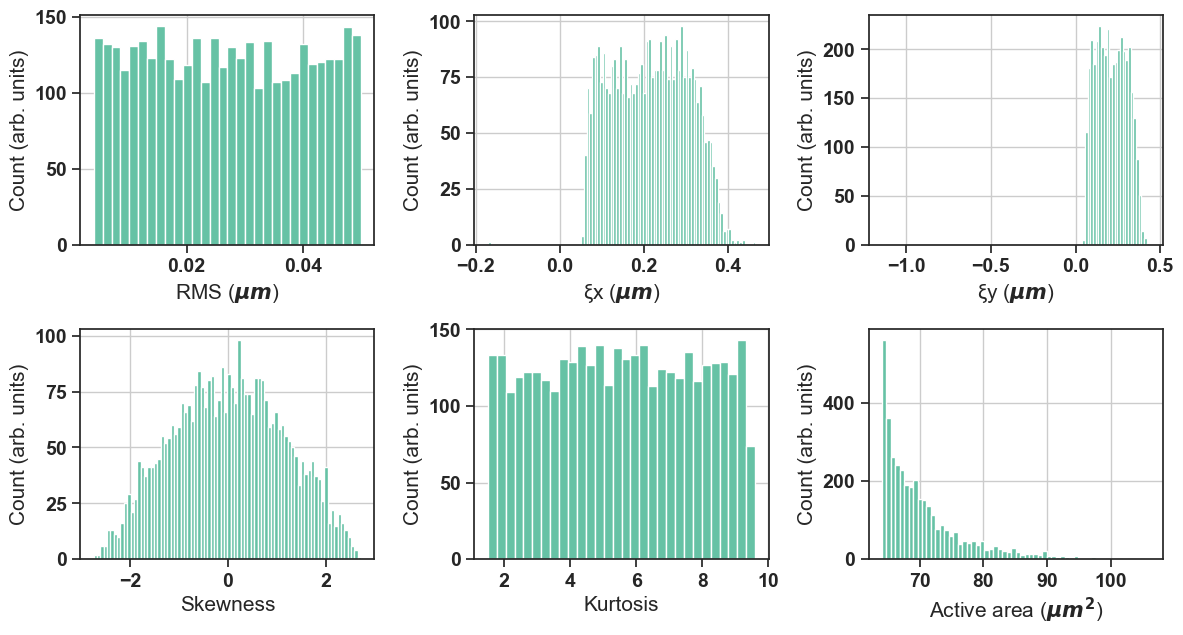

In [10]:
plot_my_dataset_info(df1)

<AxesSubplot:xlabel='clx', ylabel='cly'>

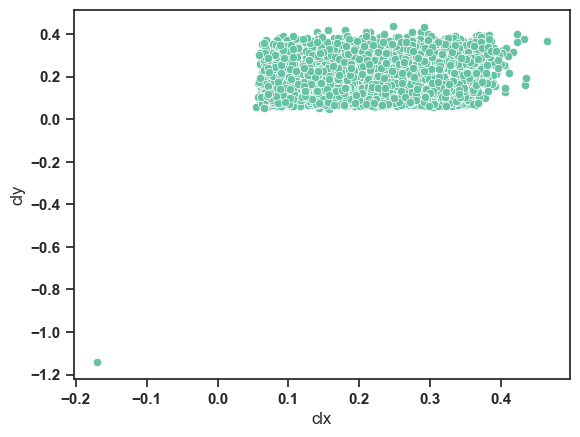

In [25]:
sns.scatterplot(data=df1, x="clx", y="cly")

### Dataset v2

In [12]:
df2.head()

,N,Sq Length,input clx,GRms,GErrorRms,G clx,G Error clx,G clx.1,G Error clx.1,G Area,...,clx,Error clx,cly,Error cly,Area,Error Area,Skewness,Error Sk,Kurtosis,Error Ku
0,600,8,0.331740,1,0,1,0,1,0,1,...,0.10347,0,0.353930,0,78.189,0,0.707370,0,8.7182,0
1,600,8,0.091783,1,0,1,0,1,0,1,...,0.33081,0,0.099022,0,66.335,0,-0.089379,0,4.9021,0
2,600,8,0.140660,1,0,1,0,1,0,1,...,0.22598,0,0.154120,0,67.099,0,-0.349290,0,6.2773,0
3,600,8,0.102570,1,0,1,0,1,0,1,...,0.17969,0,0.103510,0,72.074,0,1.845800,0,8.7589,0
4,600,8,0.185570,1,0,1,0,1,0,1,...,0.23348,0,0.197600,0,74.316,0,0.545730,0,2.8539,0


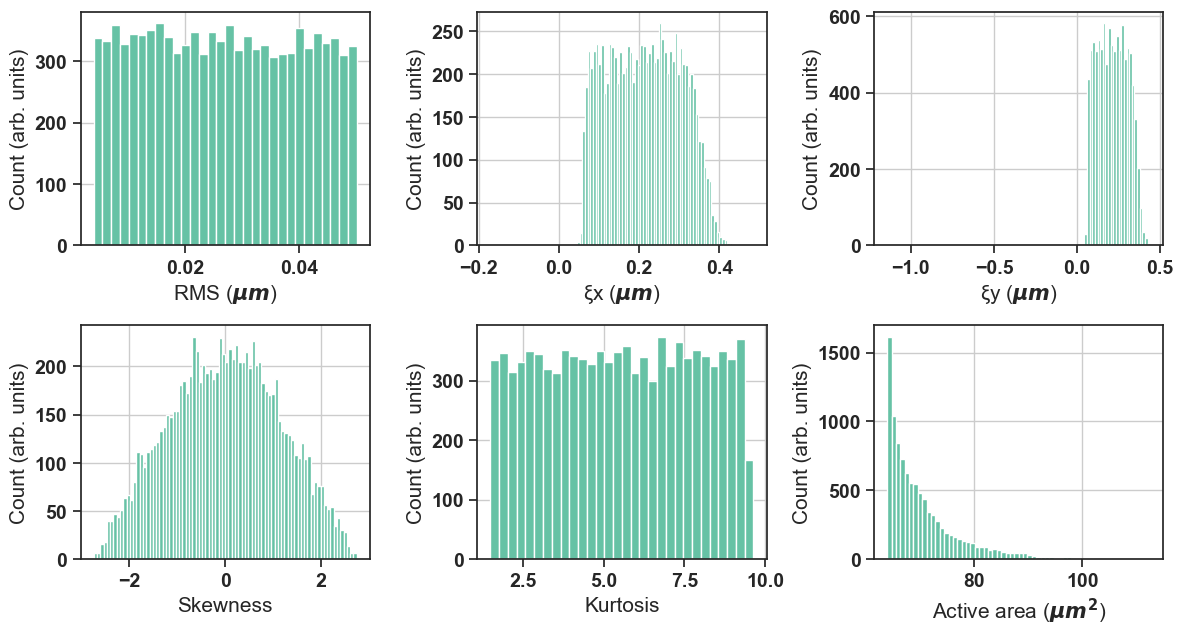

In [13]:
plot_my_dataset_info(df2)

<AxesSubplot:xlabel='clx', ylabel='cly'>

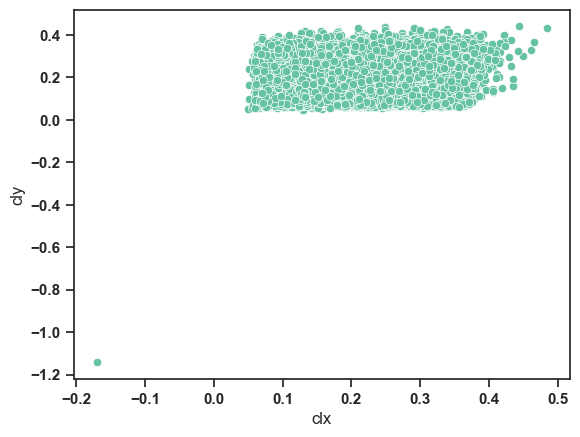

In [24]:
sns.scatterplot(data=df2, x="clx", y="cly")

### Dataset v3

In [14]:
df3.head()

,N,Sq Length,input clx,GRms,GErrorRms,G clx,G Error clx,G clx.1,G Error clx.1,G Area,...,clx,Error clx,cly,Error cly,Area,Error Area,Skewness,Error Sk,Kurtosis,Error Ku
0,600,8,0.331740,1,0,1,0,1,0,1,...,0.10347,0,0.353930,0,83.022,0,0.707370,0,8.7182,0
1,600,8,0.091783,1,0,1,0,1,0,1,...,0.33081,0,0.099022,0,67.085,0,-0.089379,0,4.9021,0
2,600,8,0.140660,1,0,1,0,1,0,1,...,0.22598,0,0.154120,0,68.203,0,-0.349290,0,6.2773,0
3,600,8,0.102570,1,0,1,0,1,0,1,...,0.17969,0,0.103510,0,74.804,0,1.845800,0,8.7589,0
4,600,8,0.185570,1,0,1,0,1,0,1,...,0.23348,0,0.197600,0,78.158,0,0.545730,0,2.8539,0


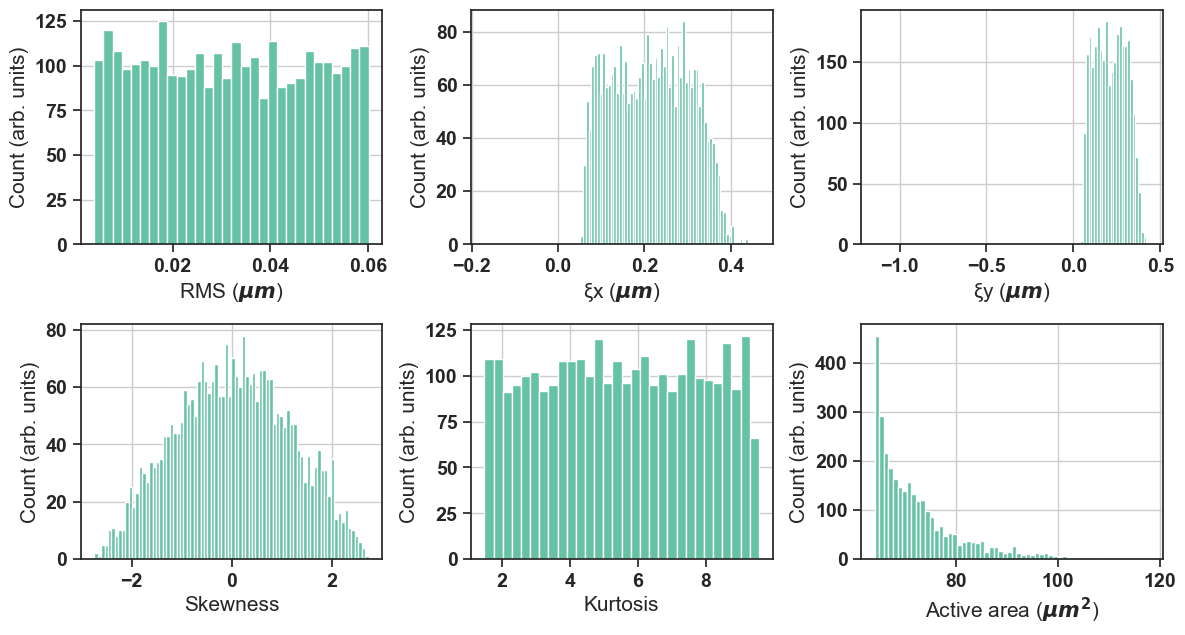

In [15]:
plot_my_dataset_info(df3)

<AxesSubplot:xlabel='clx', ylabel='cly'>

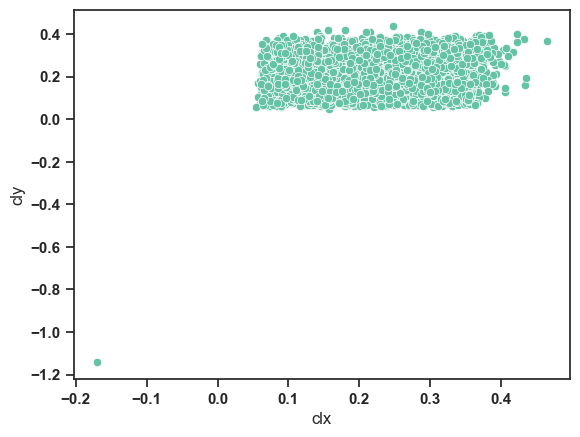

In [23]:
sns.scatterplot(data=df3, x="clx", y="cly")

### Dataset v4

In [16]:
df4.head()

,N,Sq Length,input clx,GRms,GErrorRms,G clx,G Error clx,G clx.1,G Error clx.1,G Area,...,clx,Error clx,cly,Error cly,Area,Error Area,Skewness,Error Sk,Kurtosis,Error Ku
0,600,8,0.065397,1,0,1,0,1,0,1,...,0.36062,0,0.070374,0,96.413,0,0.721100,0,5.7295,0
1,600,8,0.190790,1,0,1,0,1,0,1,...,0.18299,0,0.181760,0,85.333,0,-1.329300,0,7.6991,0
2,600,8,0.230000,1,0,1,0,1,0,1,...,0.23129,0,0.238800,0,66.348,0,0.696290,0,2.4988,0
3,600,8,0.359490,1,0,1,0,1,0,1,...,0.25489,0,0.386640,0,75.107,0,1.057200,0,8.0044,0
4,600,8,0.336930,1,0,1,0,1,0,1,...,0.30168,0,0.389440,0,64.321,0,-0.013008,0,2.2962,0


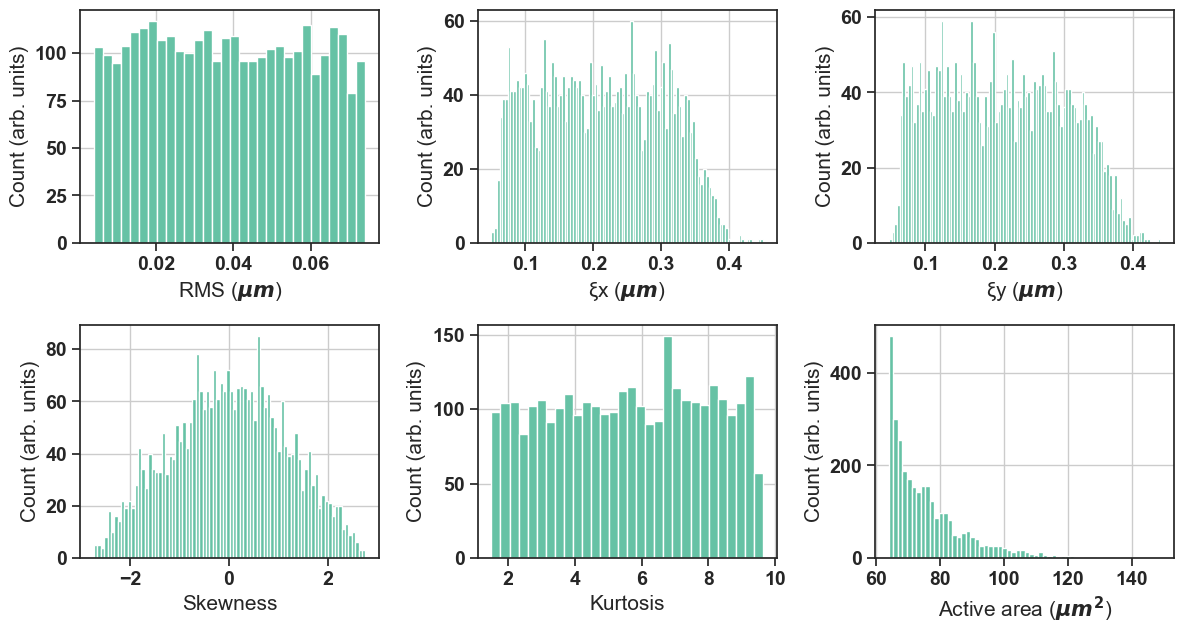

In [17]:
plot_my_dataset_info(df4)

<AxesSubplot:xlabel='clx', ylabel='cly'>

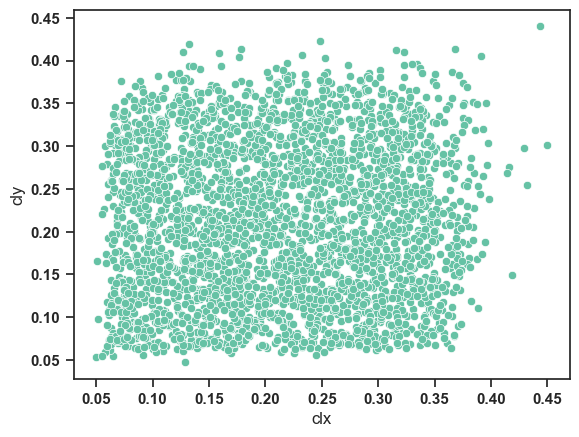

In [22]:
sns.scatterplot(data=df4, x="clx", y="cly")

In [48]:
df4[df4['Skewness'].between(-0.1, 0.1) & df4['Kurtosis'].between(2.9, 3.1)]

,N,Sq Length,input clx,GRms,GErrorRms,G clx,G Error clx,G clx.1,G Error clx.1,G Area,...,Error clx,cly,Error cly,Area,Error Area,Skewness,Error Sk,Kurtosis,Error Ku,clx-y
1083,600,8,0.19543,1,0,1,0,1,0,1,...,0,0.19898,0,90.334,0,-0.007739,0,3.0238,0,0.101134
1475,600,8,0.25068,1,0,1,0,1,0,1,...,0,0.26672,0,79.999,0,-0.060082,0,2.9020,0,0.044940
1756,600,8,0.28917,1,0,1,0,1,0,1,...,0,0.29833,0,100.240,0,-0.028041,0,2.9701,0,0.213574
2500,600,8,0.26599,1,0,1,0,1,0,1,...,0,0.29061,0,71.301,0,-0.044489,0,3.0624,0,0.066620
2944,600,8,0.22845,1,0,1,0,1,0,1,...,0,0.25499,0,67.853,0,0.038948,0,3.0831,0,0.115540


In [49]:
#Thus, data is mostly anisotropic and non-gaussian

### Heldout

In [18]:
heldout.head()

,N,Sq Length,input clx,GRms,GErrorRms,G clx,G Error clx,G clx.1,G Error clx.1,G Area,...,clx,Error clx,cly,Error cly,Area,Error Area,Skewness,Error Sk,Kurtosis,Error Ku
0,600,8,0.36,1,0,1,0,1,0,1,...,0.11772,0,0.39151,0,77.422,0,0.546830,0,5.5054,0
1,600,8,0.36,1,0,1,0,1,0,1,...,0.17174,0,0.39619,0,69.245,0,-1.340300,0,7.6015,0
2,600,8,0.36,1,0,1,0,1,0,1,...,0.30374,0,0.32638,0,68.007,0,-2.100100,0,7.5139,0
3,600,8,0.31,1,0,1,0,1,0,1,...,0.28806,0,0.34281,0,69.023,0,0.065295,0,5.4356,0
4,600,8,0.21,1,0,1,0,1,0,1,...,0.26290,0,0.23751,0,68.353,0,1.054100,0,5.5544,0


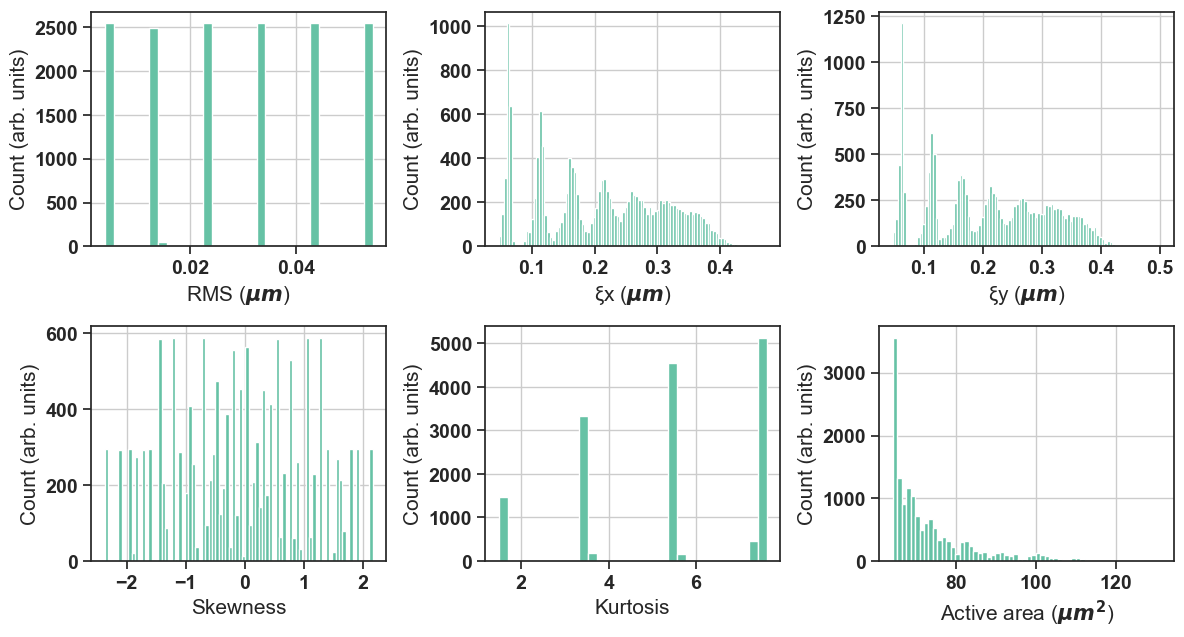

In [19]:
plot_my_dataset_info(heldout)